In [8]:
import importlib
import util
from util.plot_utils import plot_logs as plot_logs_old
importlib.reload(util.plot_utils)
from pathlib import Path, PurePath
import util
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from util.box_ops import plot_results

In [9]:
def plot_logs(logs, fields=('loss_giou', 'loss_ce', 'loss_bbox'), ewm_col=0, log_name='log.txt'):
    '''
    Function to plot specific fields from training log(s). Plots both training and test results.

    :: Inputs - logs = list containing Path objects, each pointing to individual dir with a log file
              - fields = which results to plot from each log file - plots both training and test for each field.
              - ewm_col = optional, which column to use as the exponential weighted smoothing of the plots
              - log_name = optional, name of log file if different than default 'log.txt'.

    :: Outputs - matplotlib plots of results in fields, color coded for each log file.
               - solid lines are training results, dashed lines are test results.

    '''
    func_name = "plot_utils.py::plot_logs"

    # verify logs is a list of Paths (list[Paths]) or single Pathlib object Path,
    # convert single Path to list to avoid 'not iterable' error

    if not isinstance(logs, list):
        if isinstance(logs, PurePath):
            logs = [logs]

            print(f"{func_name} info: logs param expects a list argument, converted to list[Path].")
        else:
            raise ValueError(f"{func_name} - invalid argument for logs parameter.\n \
            Expect list[Path] or single Path obj, received {type(logs)}")

    # verify valid dir(s) and that every item in list is Path object
    for i, dir in enumerate(logs):

        # import pdb; pdb.set_trace()
        if not isinstance(dir, PurePath):
            raise ValueError(f"{func_name} - non-Path object in logs argument of {type(dir)}: \n{dir}")
        if dir.exists():
            continue
        raise ValueError(f"{func_name} - invalid directory in logs argument:\n{dir}")

    # load log file(s) and plot
    dfs = [pd.read_json(Path(p) / log_name, lines=True) for p in logs]

    
    # dfs = [pd.read_json(Path(p) / log_name) for p in logs]

    fig, axs = plt.subplots(ncols=len(fields), figsize=(16, 5))

    for df, color in zip(dfs, sns.color_palette(n_colors=len(logs))):

        # import pdb; pdb.set_trace()
        for j, field in enumerate(fields):
            if field == 'mAP':
                # test_coco_eval_bbox: coco mAP
                coco_eval = pd.DataFrame(np.stack(df.test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=ewm_col).mean()
                axs[j].plot(coco_eval, c=color)
            else:
                ### use f'train_{field}' if plotting train error
                df.interpolate().ewm(com=ewm_col).mean().plot(
                    y=[f'test_{field}'],
                    ax=axs[j],
                    color=[color] * 2,
                    style=['-', '--']
                )
    for ax, field in zip(axs, fields):
        ax.legend([Path(p).name for p in logs])
        ax.set_title(field)

In [10]:
# subset contrastive against baseline bs2
log_name = 'log.txt'
log_name_base = [Path('exps/single_class/baseline')]
log_name_new = [Path('exps/contrastive_subset_retrain/bs2_from_scratch_subset')]
df_base = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_base]
df_new = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_new]
coco_eval_base = pd.DataFrame(np.stack(df_base[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_new = pd.DataFrame(np.stack(df_new[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [11]:
# all class contrastive against baseline
log_name = 'log.txt'
log_name_base = [Path('/scratch2/users/cku/adaptation/AQT/exps/r50_uda_single_scale/baseline')]
log_name_new = [Path('exps/contrastive_subset_retrain/bs2_from_scratch_all_class')]
df_base = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_base]
df_new = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_new]
coco_eval_base = pd.DataFrame(np.stack(df_base[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_new = pd.DataFrame(np.stack(df_new[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [19]:
# all class contrastive against baseline
log_name = 'log.txt'
log_name_base = [Path('/scratch2/users/cku/adaptation/AQT/exps/r50_uda_single_scale/baseline')]
log_name_new = [Path('exps/contrastive_subset_retrain/bs2_contrastive_ema_all_class')]
df_base = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_base]
df_new = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_new]
coco_eval_base = pd.DataFrame(np.stack(df_base[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_new = pd.DataFrame(np.stack(df_new[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [30]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'
log_name_base = [Path('exps/single_class/baseline_bs4')]
log_name_new = [Path('exps/contrastive_subset/from_sratch_bs4')]
df_base = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_base]
df_new = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_new]
coco_eval_base = pd.DataFrame(np.stack(df_base[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_new = pd.DataFrame(np.stack(df_new[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [10]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'
log_name_base = [Path('exps/contrastive_subset/bs2_resume_99/')]
log_name_new = [Path('exps/contrastive_subset/from_scratch_bs2/')]
df_base = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_base]
df_new = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_new]
coco_eval_base = pd.DataFrame(np.stack(df_base[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_new = pd.DataFrame(np.stack(df_new[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [13]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'
log_name_base = [Path('exps/single_class/baseline')]
log_name_new = [Path('exps/contrastive_subset_retrain/bs2_from_scratch_ema_thresh_0.6')]
df_base = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_base]
df_new = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_new]
coco_eval_base = pd.DataFrame(np.stack(df_base[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_new = pd.DataFrame(np.stack(df_new[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [5]:
# subset contrastive against baseline bs4 
log_name = 'log.txt'
log_name_base = [Path('exps/contrastive_subset_retrain/bs2_from_scratch_subset')]
log_name_new = [Path('exps/contrastive_subset_retrain/bs2_from_scratch_ema_thresh_0.6')]
df_base = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_base]
df_new = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_new]
coco_eval_base = pd.DataFrame(np.stack(df_base[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_new = pd.DataFrame(np.stack(df_new[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

In [19]:
# list of all losses in df
[loss for loss in list(df_base[0].keys())]

['train_lr',
 'train_class_error',
 'train_grad_norm',
 'train_loss',
 'train_loss_bbox',
 'train_loss_bbox_0',
 'train_loss_bbox_1',
 'train_loss_bbox_2',
 'train_loss_bbox_3',
 'train_loss_bbox_4',
 'train_loss_ce',
 'train_loss_ce_0',
 'train_loss_ce_1',
 'train_loss_ce_2',
 'train_loss_ce_3',
 'train_loss_ce_4',
 'train_loss_channel_query',
 'train_loss_giou',
 'train_loss_giou_0',
 'train_loss_giou_1',
 'train_loss_giou_2',
 'train_loss_giou_3',
 'train_loss_giou_4',
 'train_loss_instance_query',
 'train_loss_space_query',
 'train_cardinality_error_unscaled',
 'train_cardinality_error_0_unscaled',
 'train_cardinality_error_1_unscaled',
 'train_cardinality_error_2_unscaled',
 'train_cardinality_error_3_unscaled',
 'train_cardinality_error_4_unscaled',
 'train_class_error_unscaled',
 'train_loss_bbox_unscaled',
 'train_loss_bbox_0_unscaled',
 'train_loss_bbox_1_unscaled',
 'train_loss_bbox_2_unscaled',
 'train_loss_bbox_3_unscaled',
 'train_loss_bbox_4_unscaled',
 'train_loss_ce_uns

In [17]:
# all class contrastive against baseline
log_name = 'log.txt'
log_name_base = [Path('/scratch2/users/cku/adaptation/AQT/exps/r50_uda_single_scale/baseline')]
log_name_new = [Path('exps/contrastive_all_class/bs2_baseline_all_class')]
df_base = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_base]
df_new = [pd.read_json(Path(p) / log_name, lines=True) for p in log_name_new]
coco_eval_base = pd.DataFrame(np.stack(df_base[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()
coco_eval_new = pd.DataFrame(np.stack(df_new[0].test_coco_eval_bbox.dropna().values)[:, 1]).ewm(com=0).mean()

Text(0, 0.5, 'mAP')

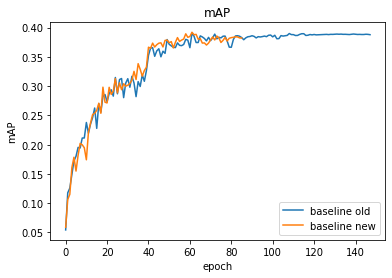

In [18]:
# checking old and new baseline model trained
plt.plot(coco_eval_base, label='baseline old')
plt.plot(coco_eval_new, label='baseline new')
plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## all class baseline vs ema

Text(0, 0.5, 'mAP')

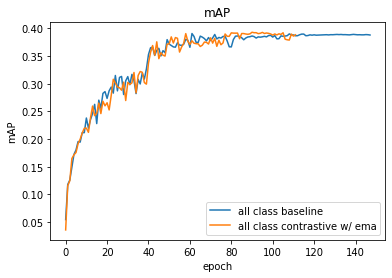

In [21]:
plt.plot(coco_eval_base, label='all class baseline')
plt.plot(coco_eval_new, label='all class contrastive w/ ema')
plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## subset w/ vs w/o ema

Text(0, 0.5, 'mAP')

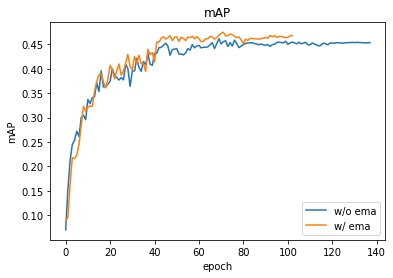

In [6]:
plt.plot(coco_eval_base, label='w/o ema')
plt.plot(coco_eval_new, label='w/ ema')
plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## subset baseline vs w/ ema

Text(0, 0.5, 'mAP')

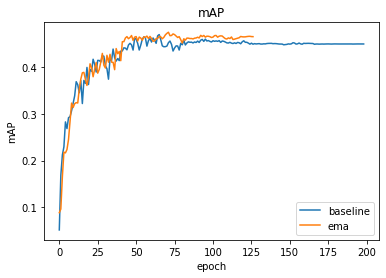

In [14]:
plt.plot(coco_eval_base, label='baseline')
plt.plot(coco_eval_new, label='ema')
plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## pretrain vs from scratch bs2 subset

Text(0, 0.5, 'mAP')

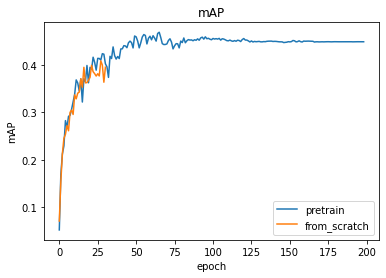

In [4]:
plt.plot(coco_eval_base, label='pretrain')
plt.plot(coco_eval_new, label='from_scratch')
plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## subset mAP bs4

Text(0, 0.5, 'mAP')

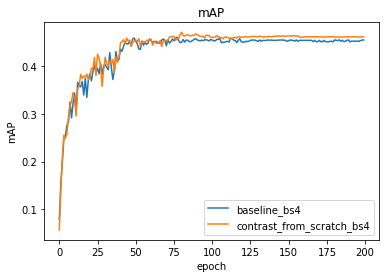

In [32]:
plt.plot(coco_eval_base, label='baseline_bs4')
plt.plot(coco_eval_new, label='contrast_from_scratch_bs4')
plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

Text(0, 0.5, 'mAP')

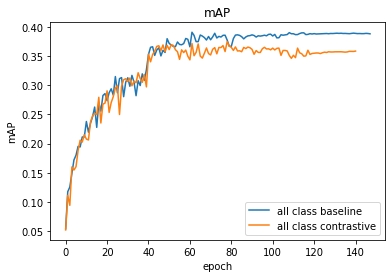

In [12]:
plt.plot(coco_eval_base, label='all class baseline')
plt.plot(coco_eval_new, label='all class contrastive')
plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## all class baseline vs ema

Text(0, 0.5, 'test_loss')

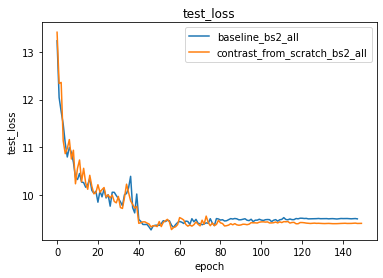

In [37]:
dfs_a = df_base[0].test_loss.interpolate().ewm(com=0).mean()
dfs_b = df_new[0].test_loss.interpolate().ewm(com=0).mean()
plt.plot(dfs_a, label='baseline_bs2_all')
plt.plot(dfs_b, label='contrast_from_scratch_bs2_all')
plt.legend(loc="upper right")
plt.title("test_loss")
plt.xlabel("epoch")
plt.ylabel("test_loss")

Text(0, 0.5, 'loss_bbox_test')

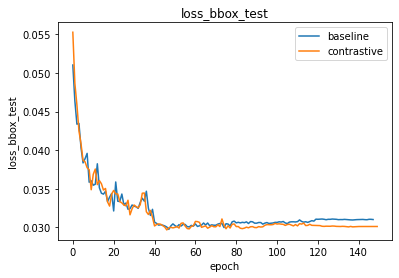

In [38]:
dfs_a = df_base[0].test_loss_bbox_unscaled.interpolate().ewm(com=0).mean()
dfs_b = df_new[0].test_loss_bbox_unscaled.interpolate().ewm(com=0).mean()
plt.plot(dfs_a, label='baseline_bs2_all')
plt.plot(dfs_b, label='contrast_from_scratch_bs2_all')
plt.legend(loc="upper right")
plt.title("loss_bbox_test")
plt.xlabel("epoch")
plt.ylabel("loss_bbox_test")

Text(0, 0.5, 'loss_giou')

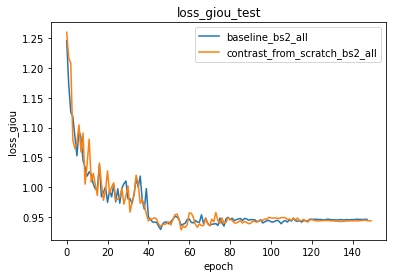

In [41]:
dfs_a = df_base[0].test_loss_giou.interpolate().ewm(com=0).mean()
dfs_b = df_new[0].test_loss_giou.interpolate().ewm(com=0).mean()
plt.plot(dfs_a, label='baseline_bs2_all')
plt.plot(dfs_b, label='contrast_from_scratch_bs2_all')
plt.legend(loc="upper right")
plt.title("loss_giou_test")
plt.xlabel("epoch")
plt.ylabel("loss_giou")

Text(0, 0.5, 'loss_ce')

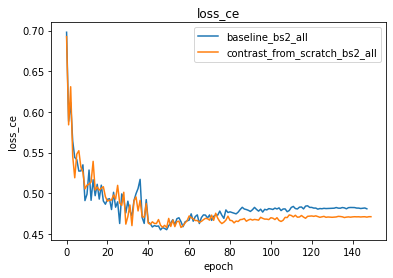

In [42]:
dfs_a = df_base[0].test_loss_ce.interpolate().ewm(com=0).mean()
dfs_b = df_new[0].test_loss_ce.interpolate().ewm(com=0).mean()
plt.plot(dfs_a, label='baseline_bs2_all')
plt.plot(dfs_b, label='contrast_from_scratch_bs2_all')
plt.legend(loc="upper right")
plt.title("loss_ce")
plt.xlabel("epoch")
plt.ylabel("loss_ce")

## subset mAP bs2

Text(0, 0.5, 'mAP')

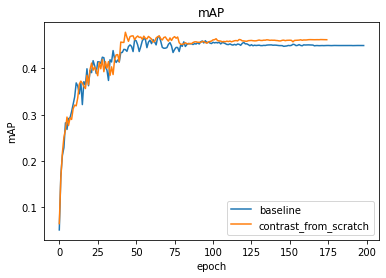

In [18]:
plt.plot(coco_eval_base, label='baseline')
plt.plot(coco_eval_new, label='contrast_from_scratch')
plt.legend(loc="lower right")
plt.title("mAP")
plt.xlabel("epoch")
plt.ylabel("mAP")

## loss bbox comparison

Text(0, 0.5, 'loss_bbox_test')

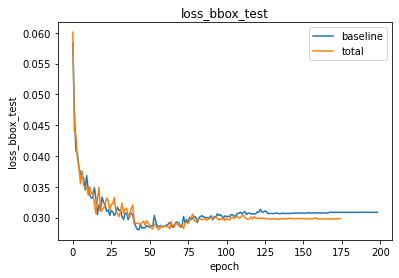

In [19]:
dfs_a = df_base[0].test_loss_bbox_unscaled.interpolate().ewm(com=0).mean()
dfs_b = df_new[0].test_loss_bbox_unscaled.interpolate().ewm(com=0).mean()
plt.plot(dfs_a, label='baseline')
plt.plot(dfs_b, label='total')
plt.legend(loc="upper right")
plt.title("loss_bbox_test")
plt.xlabel("epoch")
plt.ylabel("loss_bbox_test")

## loss giou comparison

Text(0, 0.5, 'loss_giou')

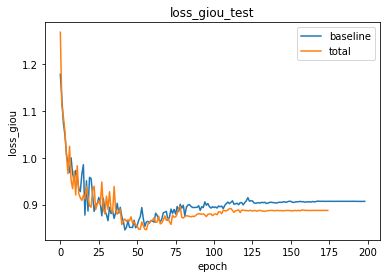

In [20]:
dfs_a = df_base[0].test_loss_giou.interpolate().ewm(com=0).mean()
dfs_b = df_new[0].test_loss_giou.interpolate().ewm(com=0).mean()
plt.plot(dfs_a, label='baseline')
plt.plot(dfs_b, label='total')
plt.legend(loc="upper right")
plt.title("loss_giou_test")
plt.xlabel("epoch")
plt.ylabel("loss_giou")

## loss ce comparison

Text(0, 0.5, 'loss_ce')

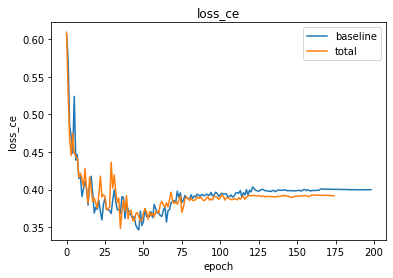

In [21]:
dfs_a = df_base[0].test_loss_ce.interpolate().ewm(com=0).mean()
dfs_b = df_new[0].test_loss_ce.interpolate().ewm(com=0).mean()
plt.plot(dfs_a, label='baseline')
plt.plot(dfs_b, label='total')
plt.legend(loc="upper right")
plt.title("loss_ce")
plt.xlabel("epoch")
plt.ylabel("loss_ce")

## inter, intra class losses

plot_utils.py::plot_logs info: logs param expects a list argument, converted to list[Path].


/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:83: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:83: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:66: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  coco_eval = pd.DataFrame(pd.np.stack(df.test_coco_eval_bbox.dropna(

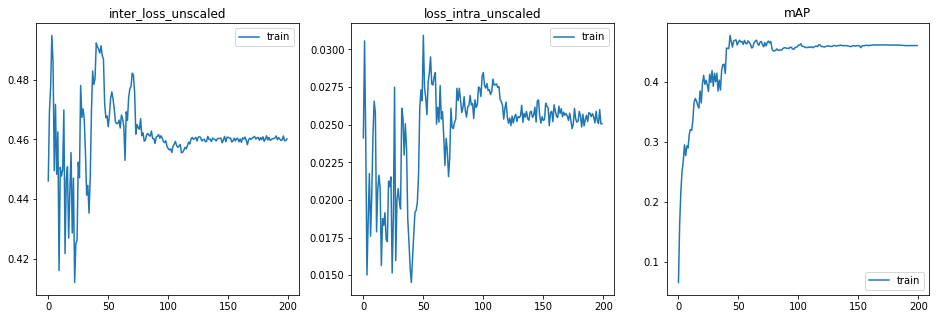

In [18]:
# inter/intra class loss, bs2 subset
log_path = Path('exps/contrastive_subset/from_scratch_bs2/')
plot_logs_old(log_path, fields=('inter_loss_unscaled', 'loss_intra_unscaled'), mode = 'train')

plot_utils.py::plot_logs info: logs param expects a list argument, converted to list[Path].


/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:83: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:83: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:66: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  coco_eval = pd.DataFrame(pd.np.stack(df.test_coco_eval_bbox.dropna(

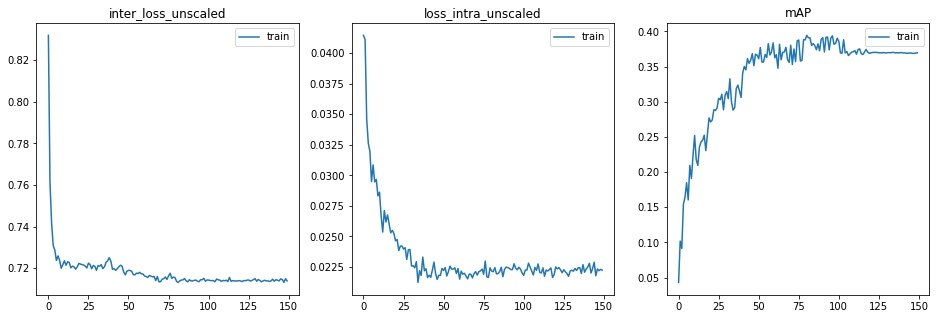

In [28]:
# inter/intra class loss, bs2 all class
log_path = Path('exps/contrastive_subset/all_class_contrastive')
plot_logs_old(log_path, fields=('inter_loss_unscaled', 'loss_intra_unscaled'), mode = 'train')

plot_utils.py::plot_logs info: logs param expects a list argument, converted to list[Path].


/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:83: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:83: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/scratch2/users/cku/adaptation/AQT_subset/util/plot_utils.py:66: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  coco_eval = pd.DataFrame(pd.np.stack(df.test_coco_eval_bbox.dropna(

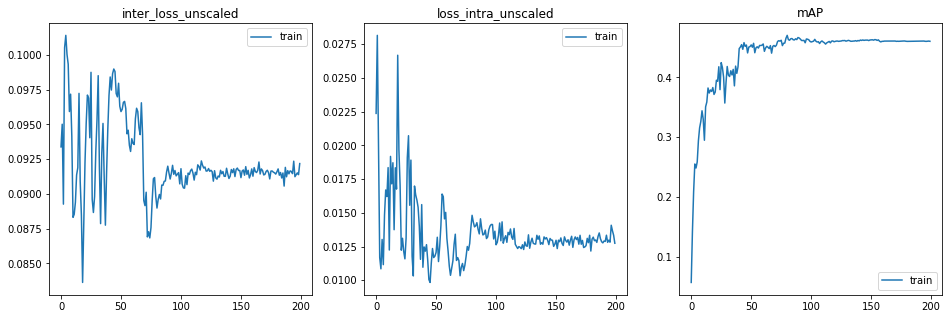

In [29]:
# inter/intra class loss
log_path = Path('exps/contrastive_subset/from_sratch_bs4')
plot_logs_old(log_path, fields=('inter_loss_unscaled', 'loss_intra_unscaled'), mode = 'train')